# Pendulum

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter  
from IPython.core.display import HTML


## Import system module

In [3]:
from pydae import ssa
from pendulum import pendulum_class


In [4]:
p = pendulum_class()

In [5]:
M = 30.0
L = 5.21
p.initialize([{'f_x':0,'M':M,'L':L,'theta':np.deg2rad(0)}],-1)
p.report_x()
p.report_u()

p_x   = -0.00
p_y   = -5.21
v_x   = -0.00
v_y   =  0.00
f_x   = -0.00


In [6]:
ssa.eval_A(p)
eig_df=ssa.damp_report(p)
eig_df

,Real,Imag,Freq.,Damp
Mode 1,-0.000017,1.372194,0.218391,1.214600e-05
Mode 2,-0.000017,-1.372194,0.218391,1.214600e-05
Mode 3,-0.000017,1902.424498,302.780263,8.760751e-09
Mode 4,-0.000017,-1902.424498,302.780263,8.760751e-09


In [7]:
freq = eig_df['Freq.']['Mode 1']
period = 1/freq
print(f'Oscillation period from small signal analysis: T = {period:0.2f} s')

Oscillation period from small signal analysis: T = 4.58 s


In [8]:
p.simulate([{'t_end':1, 'theta':np.deg2rad(-5)},
            {'t_end':50,'f_x':0}],'prev');

Oscillation period from simulation: T = 4.58 s


<IPython.core.display.Javascript object>


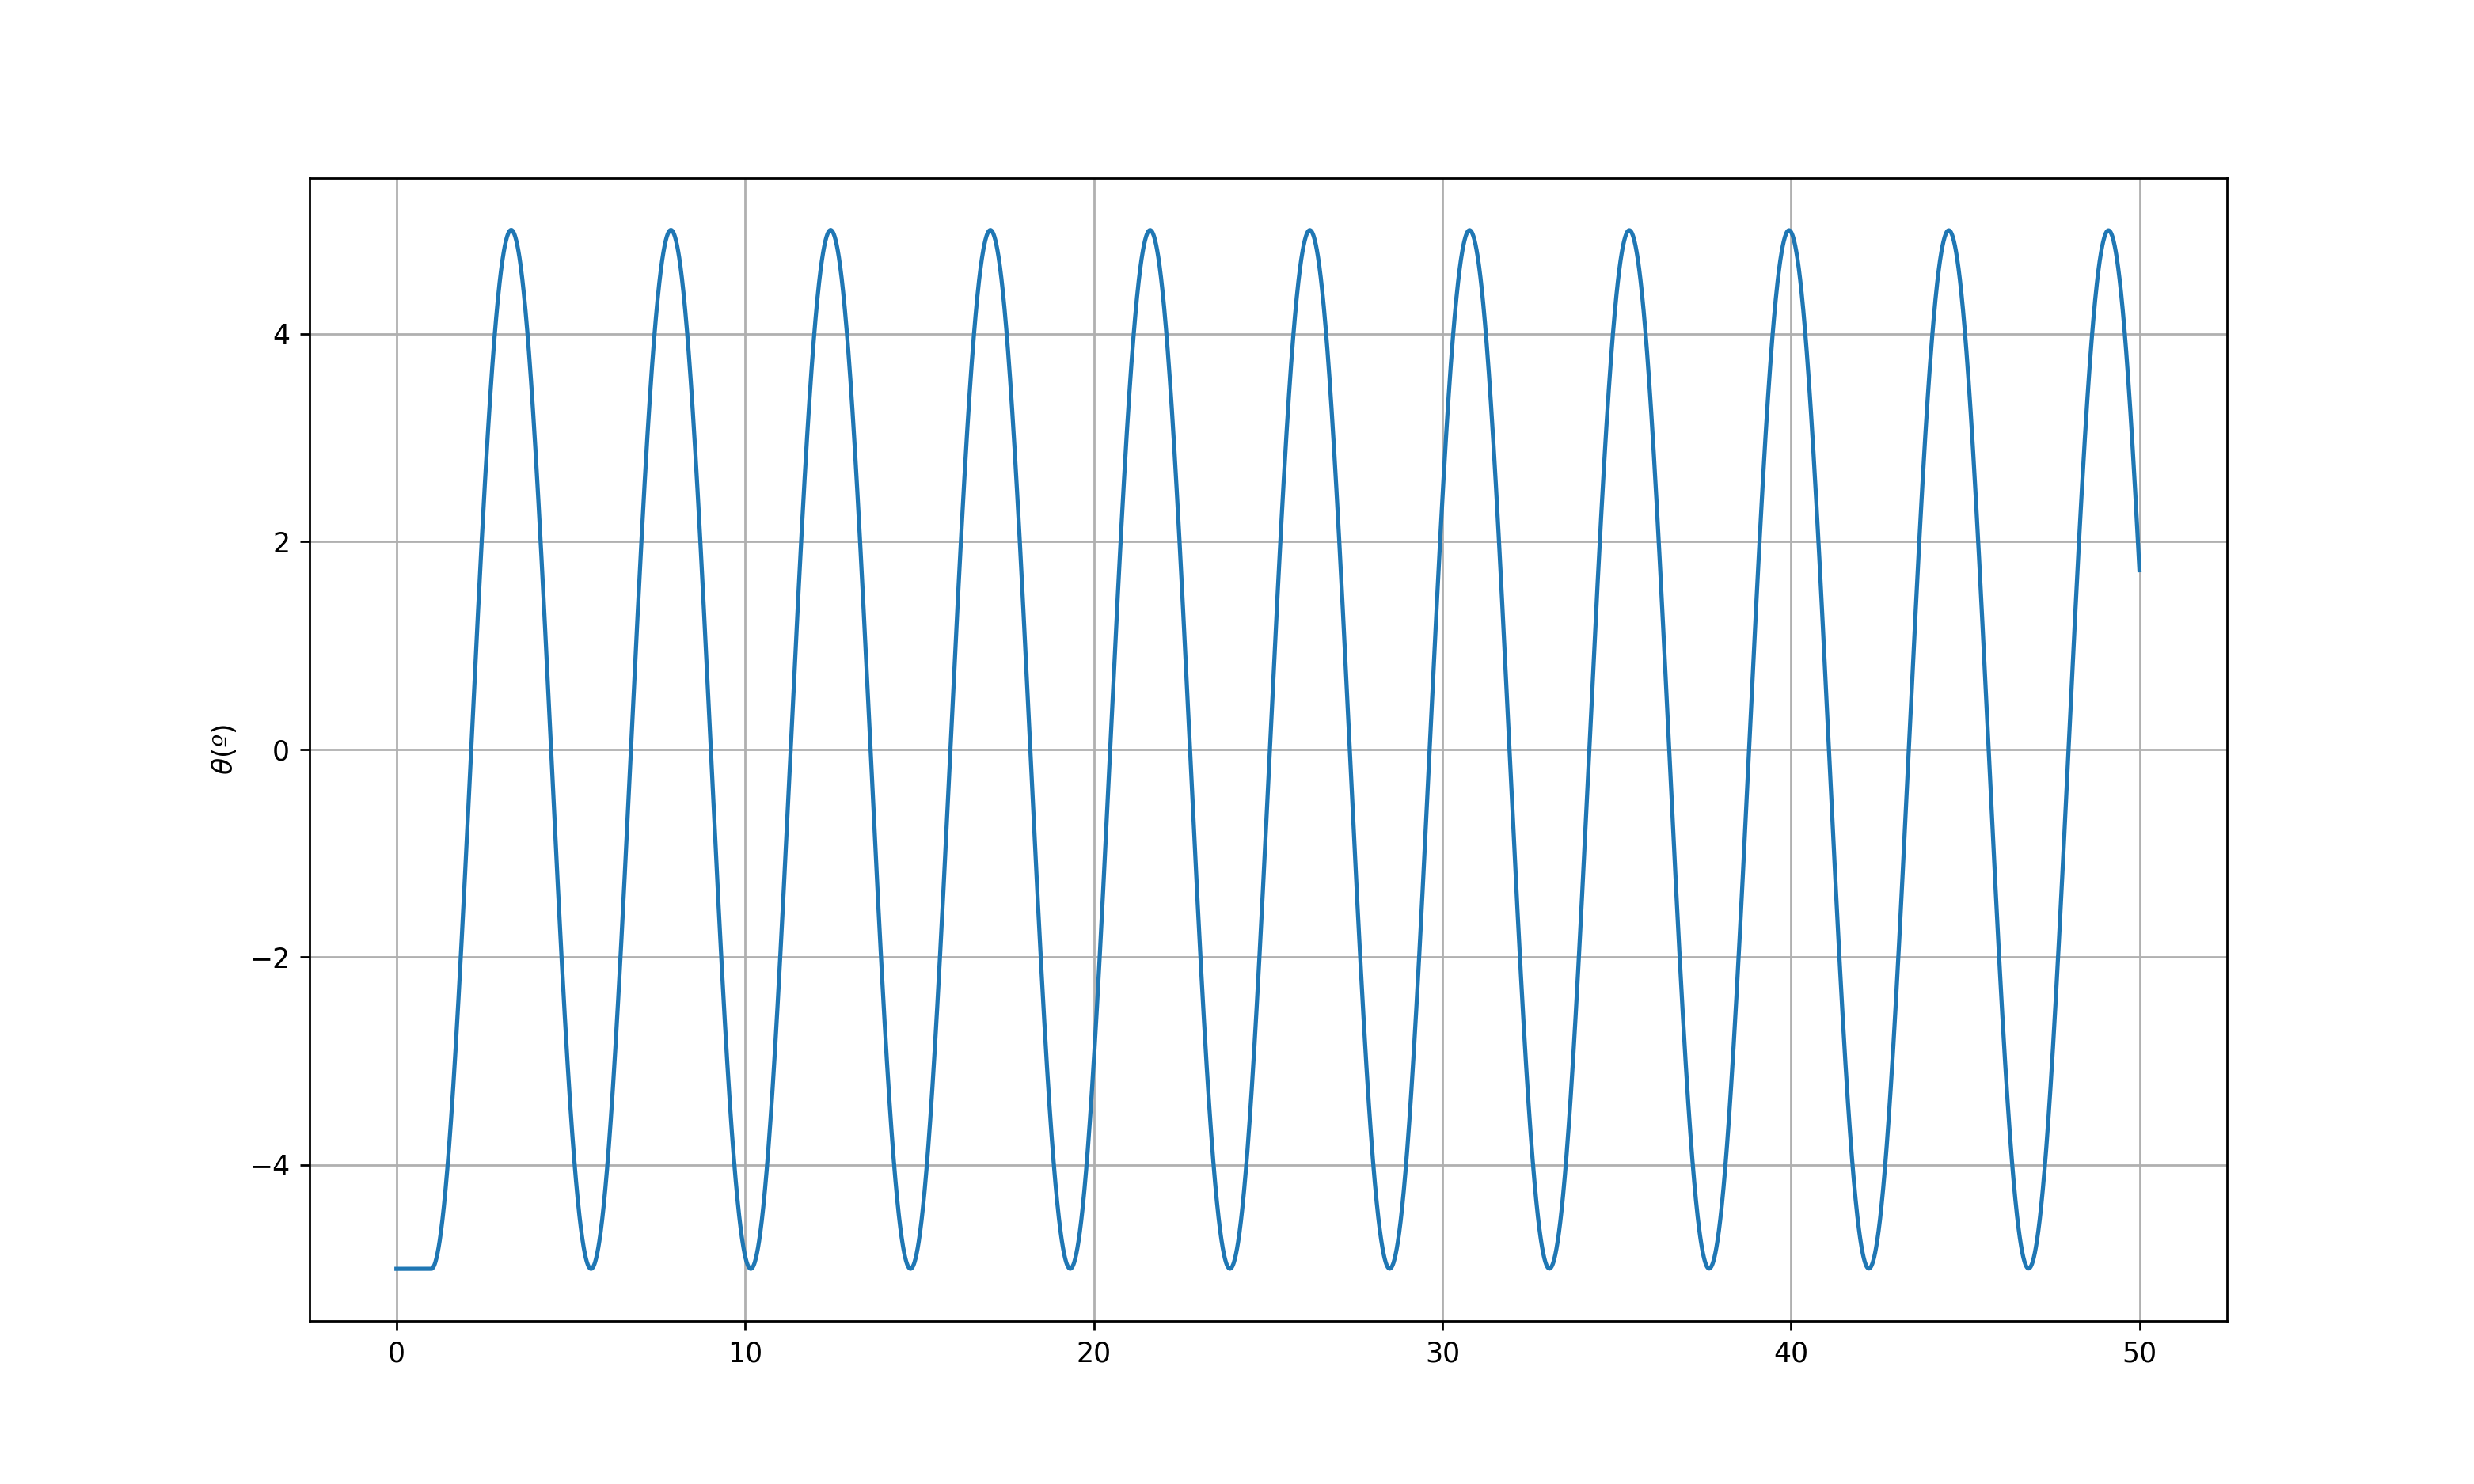

In [9]:
time = p.T[:,0]
theta = np.rad2deg(p.get_values('theta'))

idx_1 = np.where(theta==np.max(theta[(time>7)&(time<11)]))[0][0]
idx_2 = np.where(theta==np.max(theta[(time>10)&(time<14)]))[0][0]
t_1 = time[idx_1]
t_2 = time[idx_2]

period_sim = t_2 - t_1

print(f'Oscillation period from simulation: T = {period_sim:0.2f} s')

plt.close('all')
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot(p.T, np.rad2deg(p.get_values('theta')), label=f'$\theta$')
axes.grid()
axes.set_ylabel('$\\theta (º)$')
fig.show()

In [10]:
times = p.T
t_end = times[-1,0] 
N_steps = 1000
mask_values = p.get_values('theta')
values = np.rad2deg(p.get_values('theta'))
N_t = len(values)
mask = np.array([True]*N_t)
increment = np.abs((mask_values.max()-mask_values.min())/N_steps)
mask[0:(N_t-1)] =  np.abs(np.diff(mask_values))>increment
mask[0] = True
mask[:] = True
times_s = p.T[mask]
values_s = values[mask]

keyTimes = ""
keyPoints = ""
for it in range(len(times_s)):
    keyTimes  += f'{times_s[it,0]/t_end};'
    keyPoints += f'{(-values_s[it])},71.4375,103.18749;' 
keyTimes  = keyTimes[:-1].replace("'",'"')    
keyPoints = keyPoints[:-1].replace("'",'"') 


In [11]:
HTML(f'''
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   id="svg8"
   version="1.1"
   viewBox="0 0 104.56544 58.339157"
   height="58.339157mm"
   width="104.56544mm">
  <defs
     id="defs2" />
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     id="layer1"
     transform="translate(-19.155907,-101.33694)">
    <path
       style="fill:none;stroke:#555555;stroke-width:0.5;stroke-miterlimit:4;stroke-dasharray:1, 1;stroke-dashoffset:0;stop-color:#000000"
       id="path833"
       d="m 123.47135,103.1875 a 52.033852,52.033405 0 0 1 -26.016925,45.06225 52.033852,52.033405 0 0 1 -52.033852,0 52.033852,52.033405 0 0 1 -26.016925,-45.06225" />
    <g transform="rotate(0,71.4375,103.18749)">
       id="g890">
      <rect
         style="fill:#337ab7;stroke:none;stroke-width:0.499999;stroke-miterlimit:4;stroke-dasharray:0.999999, 0.999999;stroke-dashoffset:0;stop-color:#000000"
         id="rect885"
         width="1.5874945"
         height="50.270844"
         x="70.643753"
         y="101.86458" />
      <circle
         style="fill:#d9534f;stroke:#d9534f;stroke-width:0.132292;stop-color:#000000"
         id="path868"
         cx="71.4375"
         cy="155.25372"
         r="4.3562231" />
      <circle
         style="fill:#337ab7;stroke:none;stroke-width:0.132292;stop-color:#000000"
         id="path868-1"
         cx="71.4375"
         cy="103.18751"
         r="1.8505714" />
    <animateTransform attributeType="xml" attributeName="transform" type="rotate"
    calcMode="discrete"
    values={keyPoints}
        keyTimes={keyTimes} 
        dur="{t_end}s" repeatCount="indefinite" />
    </g>
  </g>
</svg>
''')

In [12]:
HTML(f'''<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   id="svg8"
   version="1.1"
   viewBox="0 0 34.504853 29.236458" 
   height="400"
   width="800">
  <defs
     id="defs2" />
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     id="layer1"
     transform="translate(-54.19671,-130.9026)">
    <rect
       style="fill:none;stroke:none;stroke-width:0.132292;stop-color:#000000"
       id="rect923"
       width="34.372559"
       height="29.104166"
       x="54.262856"
       y="130.96875" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.437498,103.1875 4.957897,56.66896"
       id="path846-1" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.4375,103.18749 9.87805,56.0212"
       id="path846-1-9" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.4375,103.18749 -4.957892,56.66896"
       id="path846-1-9-6" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.437498,103.1875 -9.878052,56.02121"
       id="path846-1-9-6-9" />
    <path
       style="fill:none;stroke:#555555;stroke-width:0.2;stroke-miterlimit:4;stroke-dasharray:1, 1;stroke-dashoffset:0;stop-color:#000000"
       id="path833"
       d="m 123.47135,103.1875 a 52.033852,52.033405 0 0 1 -26.016925,45.06225 52.033852,52.033405 0 0 1 -52.033852,0 52.033852,52.033405 0 0 1 -26.016925,-45.06225" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.4375,103.18749 5e-6,56.88542"
       id="path846" />
    <g
       id="g890"
       transform="rotate(-0.0128064,71.440161,103.18771)">
      <rect
         style="fill:#337ab7;stroke:none;stroke-width:0.499999;stroke-miterlimit:4;stroke-dasharray:1, 1;stroke-dashoffset:0;stop-color:#000000"
         id="rect885"
         width="0.39323467"
         height="52.916477"
         x="71.262543"
         y="101.9165"
         transform="matrix(0.99999974,-7.2630252e-4,-1.7091586e-4,0.99999999,0,0)" />
      <circle
         style="fill:#d9534f;stroke:#d9534f;stroke-width:0.132292;stop-color:#000000"
         id="path868"
         cx="71.4375"
         cy="155.25372"
         r="1.3838332" />
      <circle
         style="fill:#337ab7;stroke:none;stroke-width:0.132292;stop-color:#000000"
         id="path868-1"
         cx="71.4375"
         cy="103.18751"
         r="1.5198423" />
      <path
         style="fill:#d9534f;stroke:#d9534f;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
         d="m 71.425846,155.31042 -4.73e-4,2.11667"
         id="path925" />
    <animateTransform attributeType="xml" attributeName="transform" type="rotate"
    calcMode="discrete"
    values={keyPoints}
        keyTimes={keyTimes} 
        dur="{t_end}s" repeatCount="indefinite" />
    </g>
  </g>
</svg>
''')

In [13]:
p_5  = pendulum_class()
p_10 = pendulum_class()
M = 30.0
L = 5.21
p_5.initialize([{'f_x':0,'M':M,'L':L,'theta':np.deg2rad(0)}],-1)
p_5.simulate([{'t_end':1, 'theta':np.deg2rad(-5)},
            {'t_end':50,'f_x':0}],'prev');
p_10.initialize([{'f_x':0,'M':M,'L':L,'theta':np.deg2rad(0)}],-1)
p_10.simulate([{'t_end':1, 'theta':np.deg2rad(-10)},
            {'t_end':50,'f_x':0}],'prev');

In [14]:
times = p_5.T
t_end = times[-1,0] 
N_steps = 1000
mask_values = p_5.get_values('theta')
values = np.rad2deg(p_5.get_values('theta'))
N_t = len(values)
mask = np.array([True]*N_t)
increment = np.abs((mask_values.max()-mask_values.min())/N_steps)
mask[0:(N_t-1)] =  np.abs(np.diff(mask_values))>increment
mask[0] = True
mask[:] = True
times_s = p_5.T[mask]
values_s = values[mask]

keyTimes = ""
keyPoints = ""
for it in range(len(times_s)):
    keyTimes  += f'{times_s[it,0]/t_end};'
    keyPoints += f'{(-values_s[it])},71.4375,103.18749;' 
keyTimes_5  = keyTimes[:-1].replace("'",'"')    
keyPoints_5 = keyPoints[:-1].replace("'",'"') 

times = p_10.T
t_end = times[-1,0] 
N_steps = 1000
mask_values = p_10.get_values('theta')
values = np.rad2deg(p_10.get_values('theta'))
N_t = len(values)
mask = np.array([True]*N_t)
increment = np.abs((mask_values.max()-mask_values.min())/N_steps)
mask[0:(N_t-1)] =  np.abs(np.diff(mask_values))>increment
mask[0] = True
mask[:] = True
times_s = p_10.T[mask]
values_s = values[mask]

keyTimes = ""
keyPoints = ""
for it in range(len(times_s)):
    keyTimes  += f'{times_s[it,0]/t_end};'
    keyPoints += f'{(-values_s[it])},71.4375,103.18749;' 
keyTimes_10  = keyTimes[:-1].replace("'",'"')    
keyPoints_10 = keyPoints[:-1].replace("'",'"') 

HTML(f'''<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   id="svg8"
   version="1.1"
   viewBox="0 0 34.504853 29.236458" 
   height="400"
   width="800">
  <defs
     id="defs2" />
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     id="layer1"
     transform="translate(-54.19671,-130.9026)">
    <rect
       style="fill:none;stroke:none;stroke-width:0.132292;stop-color:#000000"
       id="rect923"
       width="34.372559"
       height="29.104166"
       x="54.262856"
       y="130.96875" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.437498,103.1875 4.957897,56.66896"
       id="path846-1" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.4375,103.18749 9.87805,56.0212"
       id="path846-1-9" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.4375,103.18749 -4.957892,56.66896"
       id="path846-1-9-6" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.437498,103.1875 -9.878052,56.02121"
       id="path846-1-9-6-9" />
    <path
       style="fill:none;stroke:#555555;stroke-width:0.2;stroke-miterlimit:4;stroke-dasharray:1, 1;stroke-dashoffset:0;stop-color:#000000"
       id="path833"
       d="m 123.47135,103.1875 a 52.033852,52.033405 0 0 1 -26.016925,45.06225 52.033852,52.033405 0 0 1 -52.033852,0 52.033852,52.033405 0 0 1 -26.016925,-45.06225" />
    <path
       style="fill:none;stroke:#999999;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
       d="m 71.4375,103.18749 5e-6,56.88542"
       id="path846" />
    <g
       id="g890"
       transform="rotate(-0.0128064,71.440161,103.18771)">
      <rect
         style="fill:#337ab7;stroke:none;stroke-width:0.499999;stroke-miterlimit:4;stroke-dasharray:1, 1;stroke-dashoffset:0;stop-color:#000000"
         id="rect885"
         width="0.39323467"
         height="52.916477"
         x="71.262543"
         y="101.9165"
         transform="matrix(0.99999974,-7.2630252e-4,-1.7091586e-4,0.99999999,0,0)" />
      <circle
         style="fill:#d9534f;stroke:#d9534f;stroke-width:0.132292;stop-color:#000000"
         id="path868"
         cx="71.4375"
         cy="155.25372"
         r="1.3838332" />
      <circle
         style="fill:#337ab7;stroke:none;stroke-width:0.132292;stop-color:#000000"
         id="path868-1"
         cx="71.4375"
         cy="103.18751"
         r="1.5198423" />
      <path
         style="fill:#d9534f;stroke:#d9534f;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
         d="m 71.425846,155.31042 -4.73e-4,2.11667"
         id="path925" />
    <animateTransform attributeType="xml" attributeName="transform" type="rotate"
    calcMode="discrete"
    values={keyPoints_5}
        keyTimes={keyTimes_5} 
        dur="{t_end}s" repeatCount="indefinite" />
    </g>
    <g
       id="g890"
       transform="rotate(-0.0128064,71.440161,103.18771)">
      <rect
         style="fill:#337ab7;stroke:none;stroke-width:0.499999;stroke-miterlimit:4;stroke-dasharray:1, 1;stroke-dashoffset:0;stop-color:#000000"
         id="rect885"
         width="0.39323467"
         height="52.916477"
         x="71.262543"
         y="101.9165"
         transform="matrix(0.99999974,-7.2630252e-4,-1.7091586e-4,0.99999999,0,0)" />
      <circle
         style="fill:#5cb85c;stroke:#5cb85c;stroke-width:0.132292;stop-color:#000000"
         id="path868"
         cx="71.4375"
         cy="155.25372"
         r="1.3838332" />
      <circle
         style="fill:#337ab7;stroke:none;stroke-width:0.132292;stop-color:#000000"
         id="path868-1"
         cx="71.4375"
         cy="103.18751"
         r="1.5198423" />
      <path
         style="fill:#5cb85c;stroke:#5cb85c;stroke-width:0.264583px;stroke-linecap:butt;stroke-linejoin:miter;stroke-opacity:1"
         d="m 71.425846,155.31042 -4.73e-4,2.11667"
         id="path925" />
    <animateTransform attributeType="xml" attributeName="transform" type="rotate"
    calcMode="discrete"
    values={keyPoints_10}
        keyTimes={keyTimes_10} 
        dur="{t_end}s" repeatCount="indefinite" />
    </g>
  </g>
</svg>
''')